In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
abalone = pd.read_csv('data/abalone.csv')
abalone.head(10)

,sex,length,diameter,height,wholeweight,shuckedweight,visceraweight,shellweight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [3]:
data = np.array(abalone)

In [4]:
nvar = data.shape[1]
datax = data[:,1:nvar-2]
datay = data[:,8]
print(datax)
print(datay)

[[0.455 0.365 0.095 0.514 0.2245 0.10099999999999999]
 [0.35 0.265 0.09 0.2255 0.0995 0.0485]
 [0.53 0.42 0.135 0.677 0.2565 0.1415]
 ...
 [0.6 0.475 0.205 1.176 0.5255 0.2875]
 [0.625 0.485 0.15 1.0945 0.531 0.261]
 [0.71 0.555 0.195 1.9485 0.9455 0.3765]]
[15 7 9 ... 9 10 12]


In [5]:
from sklearn.model_selection import train_test_split
trnx, tstx, trny, tsty = train_test_split(datax, datay, test_size=0.3, random_state=0)
print(trnx.shape)
print(tstx.shape)
print(trny.shape)
print(tsty.shape)

(2923, 6)
(1254, 6)
(2923,)
(1254,)


In [6]:
from sklearn import tree
tree_model = tree.DecisionTreeRegressor(max_depth=4, random_state=0)
tree_model.fit(X=trnx, y=trny)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [7]:
from sklearn.metrics import accuracy_score

tree_pred = tree_model.predict(X=tstx)
print(tsty)
print(tree_pred)

[13 8 11 ... 9 18 15]
[14.          9.7        10.18350515 ... 11.86206897 12.20043103
 10.52287582]


[128344.49981475312]


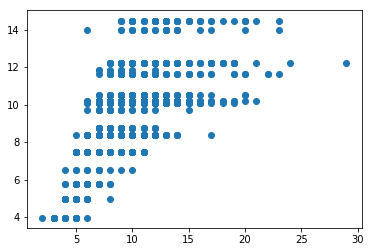

In [8]:
plt.scatter(x=tsty, y=tree_pred)
print(np.correlate(tsty, tree_pred))

In [9]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(tree_pred, tsty)))
print('R2:', metrics.r2_score(tsty, tree_pred))

RMSE: 2.487048244181769
R2: 0.4133166015693004


In [11]:
from sklearn.tree import export_graphviz
export_graphviz(tree_model, out_file='tree.dot')